In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [4]:
%matplotlib inline

Read csv and print out value counts for each column

In [5]:
df = pd.read_csv('train.csv')

df.drop(columns=['Name', 'Outcome Time'], inplace=True)

print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
Id                  0
Intake Time         0
Found Location      0
Intake Type         0
Intake Condition    0
Animal Type         0
Sex upon Intake     2
Age upon Intake     1
Breed               0
Color               0
Date of Birth       0
Outcome Type        0
dtype: int64


Data Cleaning: Fixing the age column to have all of the same unit and fix missing values as well

In [6]:
def parse_age_to_days(age_str):
    """
    Convert age strings like '2 years', '3 months', '1 week', '0 years' 
    into approximate days.
    If we see '0 years', we return a special placeholder (e.g., -1).
    If the format is invalid or missing, we return NaN.
    """
    if pd.isnull(age_str):
        return np.nan  
    
    age_str = age_str.strip().lower()

    if age_str.startswith('0 year'):
        return -1 

    parts = age_str.split()
    if len(parts) != 2:
        return np.nan
    try:
        num = float(parts[0])
    except ValueError:
        return np.nan
    
    unit = parts[1]
    if 'day' in unit:
        return num
    elif 'week' in unit:
        return num * 7
    elif 'month' in unit:
        return num * 30
    elif 'year' in unit:
        return num * 365
    else:
        return np.nan 

df['AgeDays'] = df['Age upon Intake'].apply(parse_age_to_days)

non_year_mask = df['Age upon Intake'].astype(str).str.lower().str.contains('year') == False
non_year_mean = df.loc[non_year_mask, 'AgeDays'].mean(skipna=True)

df.loc[df['AgeDays'] == -1, 'AgeDays'] = non_year_mean

overall_mean = df['AgeDays'].mean(skipna=True)
df['AgeDays'].fillna(overall_mean, inplace=True)

df.drop(columns=['Age upon Intake'], inplace=True)

C:\Users\Rohan\AppData\Local\Temp\ipykernel_11328\2646858826.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AgeDays'].fillna(overall_mean, inplace=True)


fixing negative ages

In [7]:
df['AgeDays'] = df['AgeDays'].abs()

print("Minimum AgeDays after conversion:", df['AgeDays'].min())

Minimum AgeDays after conversion: 1.0


Fixing values now for the column 'Sex upon Intake"

In [8]:
unknown_count = df['Sex upon Intake'].str.contains("Unknown", na=False).sum()
print("Number of rows with 'Unknown' in the Sex upon Intake column:", unknown_count)

df['Sex upon Intake'].fillna("Unknown", inplace=True)

print("\nMissing values per column:")
print(df.isna().sum())

Number of rows with 'Unknown' in the Sex upon Intake column: 4244

Missing values per column:
Id                  0
Intake Time         0
Found Location      0
Intake Type         0
Intake Condition    0
Animal Type         0
Sex upon Intake     0
Breed               0
Color               0
Date of Birth       0
Outcome Type        0
AgeDays             0
dtype: int64


checking for color and breed frequencies and replacing small values with "Other"

In [9]:
print("Color frequencies before replacement:")
print(df['Color'].value_counts())

print("\nBreed frequencies before replacement:")
print(df['Breed'].value_counts())


for col in ['Color', 'Breed']:
    counts = df[col].value_counts()
    rare_values = counts[counts < 50].index
    df[col] = df[col].replace(rare_values, "Other")
    
print("Color frequencies after replacement:")
print(df['Color'].value_counts())

print("\nBreed frequencies after replacement:")
print(df['Breed'].value_counts())

other_color_count = df['Color'].eq("Other").sum()
print("Number of 'Other' values for Color:", other_color_count)

other_breed_count = df['Breed'].eq("Other").sum()
print("Number of 'Other' values for Breed:", other_breed_count)


Color frequencies before replacement:
Color
Black/White                  11620
Black                         9674
Brown Tabby                   7708
White                         3945
Brown Tabby/White             3862
                             ...  
Brown/Liver                      1
White/Gray Tiger                 1
Orange Tabby/Tortie Point        1
Lynx Point/Gray                  1
Lilac Point/Black                1
Name: count, Length: 569, dtype: int64

Breed frequencies before replacement:
Breed
Domestic Shorthair Mix                         25361
Domestic Shorthair                             16046
Pit Bull Mix                                    6042
Labrador Retriever Mix                          5654
Chihuahua Shorthair Mix                         4896
                                               ...  
Turkish Angora                                     1
Treeing Walker Coonhound/Labrador Retriever        1
Great Dane/American Pit Bull Terrier               1
Belgian Ma

Creating plots to check data

Summary Statistics for AgeDays:
count    111157.000000
mean        695.876242
std        1045.885293
min           1.000000
25%          30.000000
50%         365.000000
75%         730.000000
max        8760.000000
Name: AgeDays, dtype: float64

Value Counts for Color:
Color
Black/White             11620
Black                    9674
Brown Tabby              7708
White                    3945
Brown Tabby/White        3862
                        ...  
Red Merle                  58
Calico Point               53
Cream/Black                52
Yellow Brindle/White       50
White/Blue Merle           50
Name: count, Length: 117, dtype: int64

Color Column Summary:
count          111157
unique            117
top       Black/White
freq            11620
Name: Color, dtype: object

Value Counts for Breed:
Breed
Domestic Shorthair Mix            25361
Domestic Shorthair                16046
Other                             10457
Pit Bull Mix                       6042
Labrador Retriever Mix   

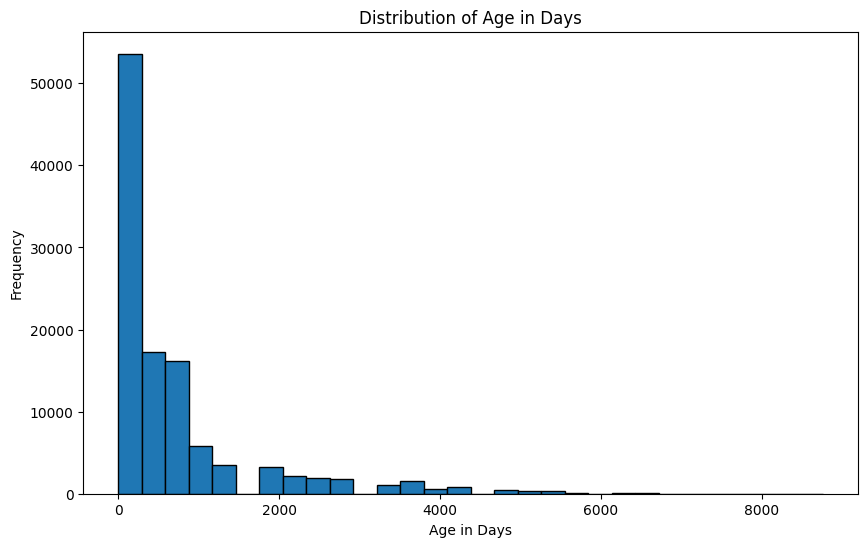

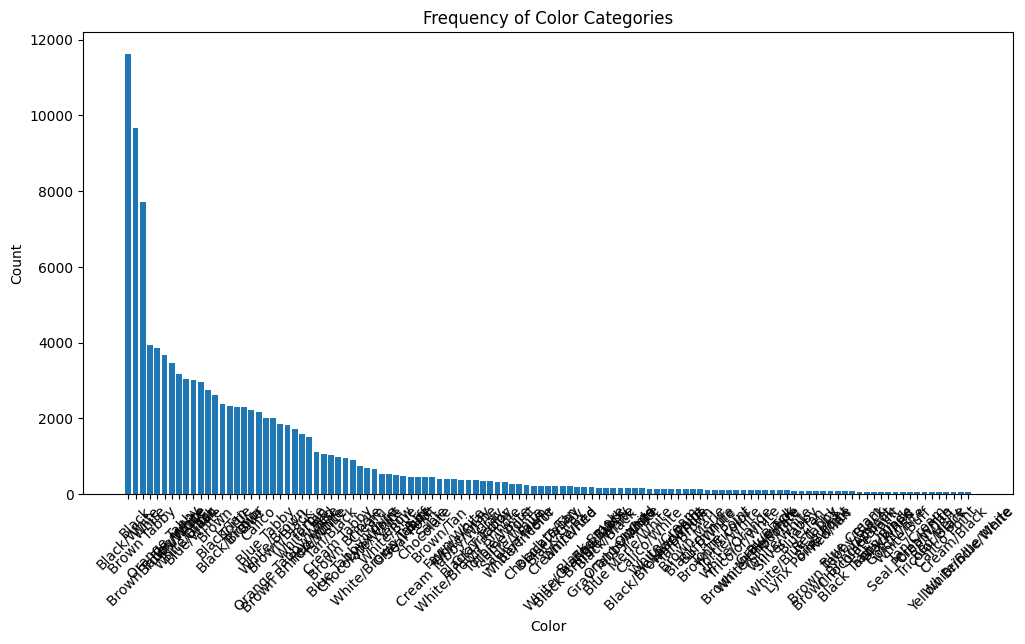

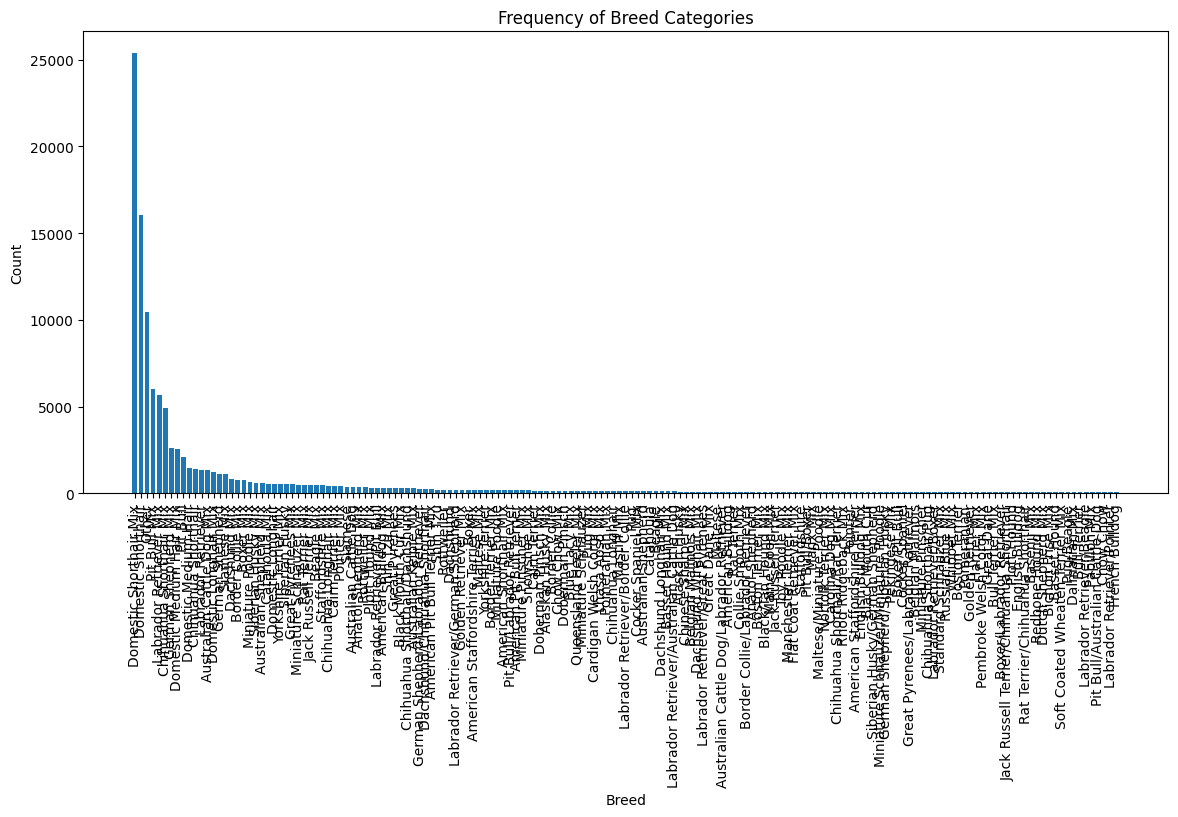

In [10]:
# Summary for AgeDays
print("Summary Statistics for AgeDays:")
print(df['AgeDays'].describe())

# Summary for Color 
print("\nValue Counts for Color:")
color_summary = df['Color'].value_counts()
print(color_summary)
print("\nColor Column Summary:")
print(df['Color'].describe())  
# Summary for Breed 
print("\nValue Counts for Breed:")
breed_summary = df['Breed'].value_counts()
print(breed_summary)
print("\nBreed Column Summary:")
print(df['Breed'].describe())  

if 'Outcome' in df.columns:
    print("\nValue Counts for Outcome:")
    outcome_summary = df['Outcome'].value_counts()
    print(outcome_summary)
    print("\nOutcome Column Summary:")
    print(df['Outcome'].describe())

# Histogram for AgeDays
plt.figure(figsize=(10, 6))
plt.hist(df['AgeDays'], bins=30, edgecolor='black')
plt.title("Distribution of Age in Days")
plt.xlabel("Age in Days")
plt.ylabel("Frequency")
plt.show()

# Bar plot for Color frequencies
color_counts = df['Color'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(color_counts.index, color_counts.values)
plt.title("Frequency of Color Categories")
plt.xlabel("Color")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.show()

# Bar plot for Breed frequencies
breed_counts = df['Breed'].value_counts()
plt.figure(figsize=(14, 6))
plt.bar(breed_counts.index, breed_counts.values)
plt.title("Frequency of Breed Categories")
plt.xlabel("Breed")
plt.ylabel("Count")
plt.xticks(rotation=90) 
plt.show()

# Bar plot for Outcome frequencies
if 'Outcome' in df.columns:
    outcome_counts = df['Outcome'].value_counts()
    plt.figure(figsize=(10, 6))
    plt.bar(outcome_counts.index, outcome_counts.values)
    plt.title("Frequency of Outcome Categories")
    plt.xlabel("Outcome")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

Part 2: Beginning of Feature Engineering
Starting with splitting Sex upon Intake column into sex and neuter status 

In [11]:
# Create the 'NeuterStatus' column
df['NeuterStatus'] = np.where(
    df['Sex upon Intake'].str.contains('Neutered|Spayed', case=False, na=False), 
    'Neutered',
    np.where(
        df['Sex upon Intake'].str.contains('Intact', case=False, na=False), 
        'Intact', 
        'Unknown'
    )
)

# Create the 'Sex' column
df['Sex'] = np.where(
    df['Sex upon Intake'].str.contains('Female', case=False, na=False),
    'Female',
    np.where(
        df['Sex upon Intake'].str.contains('Male', case=False, na=False),
        'Male',
        'Unknown'
    )
)

df.drop(columns=['Sex upon Intake'], inplace=True)

print(df.head())

output_filename = 'processed_dataset.csv'
df.to_csv(output_filename, index=False)

        Id             Intake Time                       Found Location  \
0  A706918  07/05/2015 12:59:00 PM     9409 Bluegrass Dr in Austin (TX)   
1  A724273  04/14/2016 06:43:00 PM   2818 Palomino Trail in Austin (TX)   
2  A857105  05/12/2022 12:23:00 AM   4404 Sarasota Drive in Austin (TX)   
3  A743852  02/18/2017 12:46:00 PM                          Austin (TX)   
4  A635072  04/16/2019 09:53:00 AM  415 East Mary Street in Austin (TX)   

       Intake Type Intake Condition Animal Type                   Breed  \
0            Stray           Normal         Dog                   Other   
1            Stray           Normal         Dog             Basenji Mix   
2    Public Assist           Normal         Cat      Domestic Shorthair   
3  Owner Surrender           Normal         Dog  Labrador Retriever Mix   
4    Public Assist           Normal         Dog          Great Dane Mix   

          Color Date of Birth     Outcome Type  AgeDays NeuterStatus     Sex  
0         Other    

One Hot Encodings for the columns listed below

In [12]:
columns_to_encode = ['Intake Type', 'Intake Condition', 'Animal Type', 'NeuterStatus', 'Sex']

df = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)

df.to_csv('encoded_dataset.csv', index=False)
print("One-hot encoding complete. Saved to 'encoded_dataset.csv'.")

print(df.head())


One-hot encoding complete. Saved to 'encoded_dataset.csv'.
        Id             Intake Time                       Found Location  \
0  A706918  07/05/2015 12:59:00 PM     9409 Bluegrass Dr in Austin (TX)   
1  A724273  04/14/2016 06:43:00 PM   2818 Palomino Trail in Austin (TX)   
2  A857105  05/12/2022 12:23:00 AM   4404 Sarasota Drive in Austin (TX)   
3  A743852  02/18/2017 12:46:00 PM                          Austin (TX)   
4  A635072  04/16/2019 09:53:00 AM  415 East Mary Street in Austin (TX)   

                    Breed         Color Date of Birth     Outcome Type  \
0                   Other         Other    07/05/2007  Return to Owner   
1             Basenji Mix   Sable/White    04/17/2015  Return to Owner   
2      Domestic Shorthair  Orange Tabby    05/12/2020         Transfer   
3  Labrador Retriever Mix     Chocolate    02/18/2015  Return to Owner   
4          Great Dane Mix         Black    06/03/2012  Return to Owner   

   AgeDays  Intake Type_Abandoned  Intake Typ

Changing Intake Time Column

In [13]:
# Convert to datetime
df['Intake Time'] = pd.to_datetime(df['Intake Time'], errors='coerce')

df['Intake Month'] = df['Intake Time'].dt.month
df['Intake Year'] = df['Intake Time'].dt.year
df['Intake AM_PM'] = df['Intake Time'].dt.strftime('%p')

df.drop(columns=['Intake Time'], inplace=True)

df.to_csv('time_features_added.csv', index=False)


Changing date of birth column

In [14]:
# Convert to datetime format
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')

df['Birth Month'] = df['Date of Birth'].dt.month
df['Birth Year'] = df['Date of Birth'].dt.year

df.drop(columns=['Date of Birth'], inplace=True)

df.to_csv('dob_features_added.csv', index=False)


One hot encoding new columns

In [15]:
columns_to_encode = [
    'Intake Month', 'Intake Year', 'Intake AM_PM',
    'Birth Month', 'Birth Year',
    'Color', 'Breed'
]

df = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)

df.to_csv('final_encoded_dataset.csv', index=False)


Apply Dimensionality Reduction

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

pca_df_copy = df.copy()

# Separate features and label
X_train = pca_df_copy.drop(columns=['Outcome Type', 'Id', 'Found Location'])
y_train = pca_df_copy['Outcome Type']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA(n_components=0.95)
X_pca_train = pca.fit_transform(X_scaled)

print(f"Original feature count: {X_train.shape[1]}")
print(f"Reduced feature count after PCA: {X_pca_train.shape[1]}")


Original feature count: 384
Reduced feature count after PCA: 336


In [17]:
features_train = X_pca_train.copy()

Part 3: Training dataset on different models
First one: Decision Tree Accuracy

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(df['Outcome Type'])

model_df = pca_df_copy.copy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    model_df.drop(columns=['Outcome Type', 'Id', 'Found Location'], errors='ignore'),
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Train the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Decision Tree Accuracy: 0.5873515653112631

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68     11009
           1       0.09      0.08      0.09       208
           2       0.23      0.21      0.22       690
           3       0.48      0.47      0.47      3320
           4       0.55      0.54      0.55      7005

    accuracy                           0.59     22232
   macro avg       0.40      0.40      0.40     22232
weighted avg       0.58      0.59      0.59     22232


Confusion Matrix:
[[7574   67  157 1022 2189]
 [  86   17   21   19   65]
 [ 238   21  144   98  189]
 [1074   13   97 1557  579]
 [2412   65  202  560 3766]]


Decision Tree with CV

In [20]:
from sklearn.model_selection import cross_val_score

features = model_df.copy()


dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

cv_scores = cross_val_score(dt_clf, features.drop(columns=['Outcome Type', 'Id', 'Found Location'], errors='ignore'), y, cv=10)

print("Accuracy for each fold:", cv_scores)

print("Average 10-fold CV accuracy:", np.mean(cv_scores))

Accuracy for each fold: [0.5768262  0.5786254  0.58339331 0.58186398 0.58474271 0.57790572
 0.58033465 0.59262258 0.59307242 0.588574  ]
Average 10-fold CV accuracy: 0.5837960981378719


Naive Bayes Model

In [22]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()

cv_scores_nb = cross_val_score(gnb_clf, features.drop(columns=['Outcome Type', 'Id', 'Found Location'], errors='ignore'), y, cv=10)

print("Accuracy for each fold:", cv_scores_nb)

print("Mean CV accuracy (Naive Bayes):", np.mean(cv_scores_nb))

Accuracy for each fold: [0.21779417 0.20618928 0.22085282 0.21644476 0.21761425 0.19971213
 0.20951781 0.2099865  0.20908682 0.19973009]
Mean CV accuracy (Naive Bayes): 0.21069286437044626


KNN Prediction

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

scaler = StandardScaler()

pca = PCA() 

knn = KNeighborsClassifier(n_neighbors=7)

pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('pca', pca),
    ('knn', knn)
])

scores = cross_val_score(pipeline, features.drop(columns=['Outcome Type', 'Id', 'Found Location'], errors='ignore'), y, cv=5)

print("Accuracy for each fold:", scores)

print("Mean 5-fold CV accuracy:", scores.mean())

Accuracy for each fold: [0.55537064 0.55321159 0.55571049 0.55768971 0.56043363]
Mean 5-fold CV accuracy: 0.5564832118912886


KNN Prediction with GridSearch Model

Output: 

knn_n_neighbors: 8

pca_n_components: 16

0.6281746262853017

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'pca__n_components': list(range(5, 20)),
    'knn__n_neighbors': list(range(1, 26))
}



grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(features_train.drop(columns=['Outcome Type', 'Id', 'Found Location'], errors='ignore'), y)

print(grid_search.best_params_)
print(grid_search.best_score_)

Support Vector Machines Model

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svc', SVC())
])

param_grid = {
    'pca__n_components': list(range(5, 20)),
    'svc__kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
y_pred_svm = cross_val_predict(grid_search, features.drop(columns=['Outcome Type', 'Id', 'Found Location'], errors='ignore'), y, cv=10)

acc_svm = accuracy_score(y, y_pred_svm)
print(acc_svm)
print(classification_report(y, y_pred_svm))

Nueral Networks Model



In [ ]:
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler()
mlp = MLPClassifier()

pipeline = Pipeline([
    ('scaler', scaler),
    ('mlp', mlp)
])

param_grid = {
    'mlp__hidden_layer_sizes': [(30,), (40,), (50,), (60,)],
    'mlp__activation': ['logistic', 'tanh', 'relu']
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
scores = cross_val_score(grid_search, features.drop(columns=['Outcome Type', 'Id', 'Found Location'], errors='ignore'), y, cv=5)

print(scores)
print(scores.mean())

c:\Users\Rohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Ensemble Classifiers Model

Output:

Best Accuracy so far: 0.45

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [50, 100, 150]}

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)


y_pred_rf = cross_val_predict(grid_search, features_train.drop(columns=['Outcome Type', 'Id', 'Found Location'], errors='ignore'), y, cv=5)
print(classification_report(y, y_pred_rf))

RandomForestClassifier(n_estimators=150, random_state=42)

AdaBoost Model

Output:

n_estimators: 200

0.6056030375648254

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [200]}
ada = AdaBoostClassifier(random_state=42)


grid_search = GridSearchCV(ada, param_grid=param_grid, cv=5)
grid_search.fit(features.drop(columns=['Outcome Type', 'Id', 'Found Location'], errors='ignore'), y)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_estimators': 200}
0.6056030375648254


converting train and test data set for submission

Output balanced Accuracy: 0.5114

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report

# Load CSVs
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
test_ids = test_df['Id']

# Clean + Feature Engineering
def preprocess(df):
    df = df.copy()
    df.drop(columns=['Name', 'Outcome Time'], errors='ignore', inplace=True)

    def parse_age_to_days(age_str):
        if pd.isnull(age_str): return np.nan
        age_str = age_str.strip().lower()
        if age_str.startswith('0 year'): return -1
        parts = age_str.split()
        if len(parts) != 2: return np.nan
        try: num = float(parts[0])
        except ValueError: return np.nan
        unit = parts[1]
        if 'day' in unit: return num
        elif 'week' in unit: return num * 7
        elif 'month' in unit: return num * 30
        elif 'year' in unit: return num * 365
        return np.nan

    df['AgeDays'] = df['Age upon Intake'].apply(parse_age_to_days)
    non_year_mask = df['Age upon Intake'].astype(str).str.lower().str.contains('year') == False
    non_year_mean = df.loc[non_year_mask, 'AgeDays'].mean(skipna=True)
    df.loc[df['AgeDays'] == -1, 'AgeDays'] = non_year_mean
    df['AgeDays'].fillna(df['AgeDays'].mean(skipna=True), inplace=True)
    df.drop(columns=['Age upon Intake'], errors='ignore', inplace=True)
    df['AgeDays'] = df['AgeDays'].abs()

    df['NeuterStatus'] = np.where(
        df['Sex upon Intake'].str.contains('Neutered|Spayed', case=False, na=False), 'Neutered',
        np.where(df['Sex upon Intake'].str.contains('Intact', case=False, na=False), 'Intact', 'Unknown')
    )
    df['Sex'] = np.where(
        df['Sex upon Intake'].str.contains('Female', case=False, na=False), 'Female',
        np.where(df['Sex upon Intake'].str.contains('Male', case=False, na=False), 'Male', 'Unknown')
    )
    df.drop(columns=['Sex upon Intake'], errors='ignore', inplace=True)

    for col in ['Color', 'Breed']:
        counts = df[col].value_counts()
        rare_values = counts[counts < 50].index
        df[col] = df[col].replace(rare_values, "Other")

    df['Intake Time'] = pd.to_datetime(df['Intake Time'], errors='coerce')
    df['Intake Month'] = df['Intake Time'].dt.month
    df['Intake Year'] = df['Intake Time'].dt.year
    df['Intake AM_PM'] = df['Intake Time'].dt.strftime('%p')
    df.drop(columns=['Intake Time'], inplace=True)

    df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')
    df['Birth Month'] = df['Date of Birth'].dt.month
    df['Birth Year'] = df['Date of Birth'].dt.year
    df.drop(columns=['Date of Birth'], inplace=True)

    encode_cols = [
        'Intake Type', 'Intake Condition', 'Animal Type', 'NeuterStatus', 'Sex',
        'Intake Month', 'Intake Year', 'Intake AM_PM',
        'Birth Month', 'Birth Year', 'Color', 'Breed'
    ]
    df = pd.get_dummies(df, columns=encode_cols, drop_first=False)
    return df

train_processed = preprocess(train_df)
test_processed = preprocess(test_df)

# Align Test Columns
missing_cols = set(train_processed.columns) - set(test_processed.columns)
for col in missing_cols:
    if col != 'Outcome Type':
        test_processed[col] = 0
extra_cols = set(test_processed.columns) - set(train_processed.columns)
test_processed.drop(columns=extra_cols, inplace=True)
test_processed = test_processed[train_processed.drop(columns=['Outcome Type']).columns]

# Encode + Train/Val Split
X = train_processed.drop(columns=['Outcome Type', 'Id', 'Found Location'], errors='ignore')
y_raw = train_processed['Outcome Type']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw)

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# GridSearchCV using specific parameters
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(f"\n✅ Best Params: {grid_search.best_params_}")
print(f"📊 Best CV Balanced Accuracy: {round(grid_search.best_score_, 4)}")

# Evaluate on Validation Set
val_preds = best_model.predict(X_val)
val_bal_acc = balanced_accuracy_score(y_val, val_preds)

print("\n🔍 Balanced Accuracy on Validation Set:", round(val_bal_acc, 4))
print("\nClassification Report:")
print(classification_report(y_val, val_preds, target_names=label_encoder.classes_))

# Predict on Test Set with model
X_test = test_processed.drop(columns=['Id', 'Found Location'], errors='ignore')
test_preds = best_model.predict(X_test)
test_labels = label_encoder.inverse_transform(test_preds)

submission = pd.DataFrame({
    'Id': test_ids,
    'Outcome Type': test_labels
})
submission.to_csv('submission.csv', index=False)


Fitting 3 folds for each of 1 candidates, totalling 3 fits

✅ Best Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
📊 Best CV Balanced Accuracy: 0.4919

🔍 Balanced Accuracy on Validation Set: 0.5114

Classification Report:
                 precision    recall  f1-score   support

       Adoption       0.72      0.58      0.64     11009
           Died       0.07      0.19      0.10       208
     Euthanasia       0.22      0.59      0.32       690
Return to Owner       0.39      0.80      0.52      3320
       Transfer       0.68      0.40      0.51      7005

       accuracy                           0.55     22232
      macro avg       0.42      0.51      0.42     22232
   weighted avg       0.64      0.55      0.57     22232



Trying the submission with SMOTE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report
from imblearn.over_sampling import SMOTE


# --------------------
# 1. Load CSVs
# --------------------
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
test_ids = test_df['Id']


# --------------------
# 2. Clean + Feature Engineering
# --------------------
def preprocess(df):
   df = df.copy()
   df.drop(columns=['Name', 'Outcome Time'], errors='ignore', inplace=True)


   def parse_age_to_days(age_str):
       if pd.isnull(age_str):
           return np.nan
       age_str = age_str.strip().lower()
       if age_str.startswith('0 year'):
           return -1
       parts = age_str.split()
       if len(parts) != 2:
           return np.nan
       try:
           num = float(parts[0])
       except ValueError:
           return np.nan
       unit = parts[1]
       if 'day' in unit:
           return num
       elif 'week' in unit:
           return num * 7
       elif 'month' in unit:
           return num * 30
       elif 'year' in unit:
           return num * 365
       return np.nan


   df['AgeDays'] = df['Age upon Intake'].apply(parse_age_to_days)
   non_year_mask = df['Age upon Intake'].astype(str).str.lower().str.contains('year') == False
   non_year_mean = df.loc[non_year_mask, 'AgeDays'].mean(skipna=True)
   df.loc[df['AgeDays'] == -1, 'AgeDays'] = non_year_mean
   df['AgeDays'].fillna(df['AgeDays'].mean(skipna=True), inplace=True)
   df.drop(columns=['Age upon Intake'], errors='ignore', inplace=True)
   df['AgeDays'] = df['AgeDays'].abs()


   df['NeuterStatus'] = np.where(
       df['Sex upon Intake'].str.contains('Neutered|Spayed', case=False, na=False), 'Neutered',
       np.where(df['Sex upon Intake'].str.contains('Intact', case=False, na=False), 'Intact', 'Unknown')
   )
   df['Sex'] = np.where(
       df['Sex upon Intake'].str.contains('Female', case=False, na=False), 'Female',
       np.where(df['Sex upon Intake'].str.contains('Male', case=False, na=False), 'Male', 'Unknown')
   )
   df.drop(columns=['Sex upon Intake'], errors='ignore', inplace=True)


   for col in ['Color', 'Breed']:
       counts = df[col].value_counts()
       rare_values = counts[counts < 50].index
       df[col] = df[col].replace(rare_values, "Other")


   df['Intake Time'] = pd.to_datetime(df['Intake Time'], errors='coerce')
   df['Intake Month'] = df['Intake Time'].dt.month
   df['Intake Year'] = df['Intake Time'].dt.year
   df['Intake AM_PM'] = df['Intake Time'].dt.strftime('%p')
   df.drop(columns=['Intake Time'], inplace=True)


   df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')
   df['Birth Month'] = df['Date of Birth'].dt.month
   df['Birth Year'] = df['Date of Birth'].dt.year
   df.drop(columns=['Date of Birth'], inplace=True)


   encode_cols = [
       'Intake Type', 'Intake Condition', 'Animal Type', 'NeuterStatus', 'Sex',
       'Intake Month', 'Intake Year', 'Intake AM_PM',
       'Birth Month', 'Birth Year', 'Color', 'Breed'
   ]
   df = pd.get_dummies(df, columns=encode_cols, drop_first=False)
   return df

train_processed = preprocess(train_df)
test_processed = preprocess(test_df)

# --------------------
# 3. Align Test Columns
# --------------------
missing_cols = set(train_processed.columns) - set(test_processed.columns)
for col in missing_cols:
   if col != 'Outcome Type':
       test_processed[col] = 0
extra_cols = set(test_processed.columns) - set(train_processed.columns)
test_processed.drop(columns=extra_cols, inplace=True)
test_processed = test_processed[train_processed.drop(columns=['Outcome Type']).columns]

# --------------------
# 4. Encode + Train/Val Split
# --------------------
X = train_processed.drop(columns=['Outcome Type', 'Id', 'Found Location'], errors='ignore')
y_raw = train_processed['Outcome Type']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw)

X_train, X_val, y_train, y_val = train_test_split(
   X, y, stratify=y, test_size=0.2, random_state=42
)

# --------------------
# 5. Apply SMOTE to Balance the Training Data
# --------------------
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# --------------------
# 6. GridSearchCV for Best Model
# --------------------
param_grid = {
   'n_estimators': [200],
   'max_depth': [20],
   'min_samples_split': [5],
   'min_samples_leaf': [2],
}

grid_search = GridSearchCV(
   estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
   param_grid=param_grid,
   scoring='balanced_accuracy',
   cv=3,
   n_jobs=-1,
   verbose=1
)

grid_search.fit(X_train_sm, y_train_sm)
best_model = grid_search.best_estimator_

print(f"\n✅ Best Params: {grid_search.best_params_}")
print(f"📊 Best CV Balanced Accuracy: {round(grid_search.best_score_, 4)}")

# --------------------
# 7. Evaluate on Validation Set
# --------------------
val_preds = best_model.predict(X_val)
val_bal_acc = balanced_accuracy_score(y_val, val_preds)

print("\n🔍 Balanced Accuracy on Validation Set:", round(val_bal_acc, 4))
print("\nClassification Report:")
print(classification_report(y_val, val_preds, target_names=label_encoder.classes_))

# --------------------
# 8. Predict on Test Set with Best Model
# --------------------
X_test = test_processed.drop(columns=['Id', 'Found Location'], errors='ignore')
test_preds = best_model.predict(X_test)
test_labels = label_encoder.inverse_transform(test_preds)

submission = pd.DataFrame({
   'Id': test_ids,
   'Outcome Type': test_labels
})
submission.to_csv('submission.csv', index=False)
print("✅ Final predictions saved to 'submission.csv'")